In [19]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [34]:
medians = pd.DataFrame(json.load(open("out/congressional_test.json"))).median() * 100

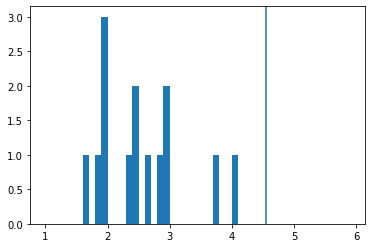

In [35]:
a = np.floor(min(medians))
b = np.ceil(max(medians)) + 1
plt.hist(medians, bins=np.arange(a, b, 0.1))
plt.axvline(4.55)